Talvez eu possa fazer com que as funções que exportam as tabelas façam isso mais detalhe. Com isso, posso colocar na função de impressão os filtros necessários para que haja seleção do tipo de nível granular que deve aparecer no gráfico.

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
pd.options.display.float_format = '{:,.2f}'.format

from itertools import product

import matplotlib.pyplot as plt

import plotly.express as px

import bamboolib as bam
#bam.enable()
bam.disable()

import plotly.express as px

import app_rais.potec as potec

The bamboolib extension was disabled. You can enable it again via 'bam.enable()'. In case that bamboolib was not helpful to you, we are sorry and would like to fix this. Please write us a quick mail to info@8080labs.com so that we can serve you better in the future. Best regards, Tobias and Florian


In [2]:
list_column_keep_2010 = [
    'CBO Ocupação 2002'
    , 'CNAE 2.0 Classe'
    , 'CNAE 95 Classe'
    , 'Vínculo Ativo 31/12'
    , 'Faixa Etária'
    , 'Faixa Remun Dezem (SM)'
    , 'Faixa Remun Média (SM)'
    , 'Faixa Tempo Emprego'
    , 'Escolaridade após 2005'
    , 'Mun Trab'
    , 'Município'
    , 'Nacionalidade'
    , 'Natureza Jurídica'
    , 'Vl Remun Dezembro Nom'
    , 'Vl Remun Dezembro (SM)'
    , 'Vl Remun Média Nom'
    , 'Vl Remun Média (SM)'
    , 'CNAE 2.0 Subclasse'
    , 'Tamanho Estabelecimento'
    , 'Tipo Estab'
    , 'Tipo Estab.1'
    , 'Tipo Vínculo'
]

type_cat_tam_estabelecimento = CategoricalDtype(categories=[ -1, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], ordered=True)
type_cat_escolaridade = CategoricalDtype(categories=[ -1, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], ordered=True)
type_cat_faixa_etaria = CategoricalDtype(categories=['01', '02', '03', '04', '05', '06', '07', '08'], ordered=True)
type_cat_faixa_remu_media = CategoricalDtype(
    categories=[
        '00'
        ,'01'
        , '02'
        , '03'
        , '04'
        , '05'
        , '06'
        , '07'
        , '08'
        , '09'
        , '10'
        , '11'
    ]
    , ordered=True
)

type_cat_faixa_remu_media_dezembro = CategoricalDtype(
    categories=[
        '00'
        , '01'
        , '02'
        , '03'
        , '04'
        , '05'
        , '06'
        , '07'
        , '08'
        , '09'
        , '10'
        , '11'
        , '12'
    ]
    , ordered=True
)

type_cat_ind_tec = CategoricalDtype(
    categories=[
        'High-technology'
        , 'Medium-high-technology'
        , 'Medium-low-technology'
        , 'Low-technology'
        , 'Without Classification'
    ]
    , ordered=True
)


type_cat_know_services = CategoricalDtype(
    categories=[
        'High-tech knowledge-intensive services'
        , 'Knowledge-intensive financial services'
        , 'Knowledge-intensive market services'
        , 'Other knowledge-intensive services'
        , 'Less knowledge-intensive market services'
        , 'Other less knowledge-intensive services'
        , 'Without Classification'
    ]
    , ordered=True
)

type_cat_potec_grupo = CategoricalDtype(
    categories= ['Profissionais do Ensino', 'Engenheiros', 'Profissionais científicos', 'Pesquisadores', 'Diretores e Gerentes de P&D']    
        , ordered=True
)

type_cat_potec = CategoricalDtype(
    categories= ['Diretores e Gerentes de P&D'
                 ,'Engenheiros Mecatrônicos'
                 ,'Engenheiros Civis etc'
                 ,'Engenheiros agrônomos, de alimentos, florestais e de pesca'
                 ,'Pesquisadores'
                 ,'Biotecnologistas, geneticistas, pesquisadores em metrologia e especialistas em calibrações metereológicas'
                 ,'Matemáticos, estatísticos e afins'
                 ,'Profissionais da Informática'
                 ,'Físicos, químicos e afins'
                 ,'Biólogos e biomédicos'
                 ,'Professores de ensino Profissional'
                 ,'Professores de ensino superior'
                 ,'Demais Ocupações'
                ]    
        , ordered=True
)


dic_dtype = {
    'CBO Ocupação 2002' : 'category'
    ,'CNAE 2.0 Classe' : 'category'
    ,'CNAE 95 Classe' : 'category'
    ,'Faixa Etária' : type_cat_faixa_etaria
    ,'Faixa Remun Dezem (SM)' : type_cat_faixa_remu_media_dezembro
    ,'Faixa Remun Média (SM)' : type_cat_faixa_remu_media
    ,'Faixa Tempo Emprego' : 'category'
    ,'Escolaridade após 2005' : type_cat_escolaridade
    ,'Mun Trab' : 'category'
    ,'Município' : 'category'
    ,'Nacionalidade' : 'category'
    ,'Natureza Jurídica' : 'category'
    ,'CNAE 2.0 Subclasse' : 'category'
    ,'Tamanho Estabelecimento' : type_cat_tam_estabelecimento
    ,'Tipo Estab' : 'category'
    ,'Tipo Estab.1' : 'category'
    ,'Tipo Vínculo' : 'category'
    , 'Vl Remun Dezembro Nom' : np.float64
    , 'Vl Remun Média Nom' : np.float32
    , 'Vl Remun Dezembro (SM)' : np.float64
    , 'Vl Remun Média (SM)' : np.float64
    , 'Tempo Emprego' : np.float64
    , 'territorio_tese':'category'
    , 'arranjo':'category'
    , 'knowledge_services':'category'
    , 'technology_industries':type_cat_ind_tec
    , 'potec':type_cat_potec
}

dict_porte = {
    -1:'Ignorado'
    , 1:'Até 49'
    , 2:'Até 49'
    , 3:'Até 49'
    ,4:'Até 49'
    ,5:'Até 49'
    ,6:'de 50 a 99'
    ,7:'de 100 a 249'
    ,8:'de 250 a 499'
    ,9:'de 500 a 999'
    ,10:'a partir de 1000'
}


type_porte = CategoricalDtype(
    categories=[
        'Ignorado'
        ,'Até 49'
        ,'de 50 a 99'
        ,'de 100 a 249'
        ,'de 250 a 499'
        ,'de 500 a 999'
        ,'a partir de 1000'
    ]
    , ordered=True
)

dict_potec = {'Diretores e Gerentes de P&D':'Diretores e Gerentes de P&D'
              ,'Engenheiros Mecatrônicos':'Engenheiros'
              ,'Engenheiros Civis etc':'Engenheiros'
              ,'Engenheiros agrônomos, de alimentos, florestais e de pesca':'Engenheiros' 
              ,'Pesquisadores':'Pesquisadores'
              ,'Biotecnologistas, geneticistas, pesquisadores em metrologia e especialistas em calibrações metereológicas':'Profissionais científicos'
              ,'Matemáticos, estatísticos e afins':'Profissionais científicos'
              ,'Profissionais da Informática':'Profissionais científicos'
              ,'Físicos, químicos e afins':'Profissionais científicos'
              ,'Biólogos e biomédicos':'Profissionais científicos'
              ,'Professores de ensino Profissional':'Profissionais do Ensino'
              ,'Professores de ensino superior':'Profissionais do Ensino'
              ,'Demais Ocupações':'Demais Ocupações'
             }


dict_nat_jur={
    '1015':'Administração Pública'
    ,'1023':'Administração Pública'
    ,'1031':'Administração Pública'
    ,'1040':'Administração Pública'
    ,'1058':'Administração Pública'
    ,'1066':'Administração Pública'
    ,'1074':'Administração Pública'
    ,'1082':'Administração Pública'
    ,'1104':'Administração Pública'
    ,'1112':'Administração Pública'
    ,'1120':'Administração Pública'
    ,'1139':'Administração Pública'
    ,'1147':'Administração Pública'
    ,'1155':'Administração Pública'
    ,'1163':'Administração Pública'
    ,'1171':'Administração Pública'
    ,'1180':'Administração Pública'
    ,'1198':'Administração Pública'
    ,'1201':'Administração Pública'
    ,'1210':'Administração Pública'
    ,'1228':'Administração Pública'
    ,'1236':'Administração Pública'
    ,'1244':'Administração Pública'
    ,'1252':'Administração Pública'
    ,'1260':'Administração Pública'
    ,'1279':'Administração Pública'
    ,'2011':'Entidades Empresariais'
    ,'2038':'Entidades Empresariais'
    ,'2046':'Entidades Empresariais'
    ,'2054':'Entidades Empresariais'
    ,'2062':'Entidades Empresariais'
    ,'2070':'Entidades Empresariais'
    ,'2089':'Entidades Empresariais'
    ,'2097':'Entidades Empresariais'
    ,'2127':'Entidades Empresariais'
    ,'2135':'Entidades Empresariais'
    ,'2143':'Entidades Empresariais'
    ,'2151':'Entidades Empresariais'
    ,'2160':'Entidades Empresariais'
    ,'2178':'Entidades Empresariais'
    ,'2194':'Entidades Empresariais'
    ,'2216':'Entidades Empresariais'
    ,'2224':'Entidades Empresariais'
    ,'2232':'Entidades Empresariais'
    ,'2240':'Entidades Empresariais'
    ,'2259':'Entidades Empresariais'
    ,'2267':'Entidades Empresariais'
    ,'2275':'Entidades Empresariais'
    ,'2283':'Entidades Empresariais'
    ,'2291':'Entidades Empresariais'
    ,'2305':'Entidades Empresariais'
    ,'2313':'Entidades Empresariais'
    ,'3034':'Entidades sem Fins Lucrativos'
    ,'3069':'Entidades sem Fins Lucrativos'
    ,'3077':'Entidades sem Fins Lucrativos'
    ,'3085':'Entidades sem Fins Lucrativos'
    ,'3107':'Entidades sem Fins Lucrativos'
    ,'3115':'Entidades sem Fins Lucrativos'
    ,'3131':'Entidades sem Fins Lucrativos'
    ,'3204':'Entidades sem Fins Lucrativos'
    ,'3212':'Entidades sem Fins Lucrativos'
    ,'3220':'Entidades sem Fins Lucrativos'
    ,'3239':'Entidades sem Fins Lucrativos'
    ,'3247':'Entidades sem Fins Lucrativos'
    ,'3255':'Entidades sem Fins Lucrativos'
    ,'3263':'Entidades sem Fins Lucrativos'
    ,'3271':'Entidades sem Fins Lucrativos'
    ,'3280':'Entidades sem Fins Lucrativos'
    ,'3298':'Entidades sem Fins Lucrativos'
    ,'3301':'Entidades sem Fins Lucrativos'
    ,'3999':'Entidades sem Fins Lucrativos'
    ,'4014':'Pessoas Físicas'
    ,'4022':'Pessoas Físicas'
    ,'4081':'Pessoas Físicas'
    ,'4090':'Pessoas Físicas'
    ,'4111':'Pessoas Físicas'
    ,'4120':'Pessoas Físicas'
    ,'5010':'Organizações Internacionais'
    ,'5029':'Organizações Internacionais'
    ,'5037':'Organizações Internacionais'
    ,'-1':'Ignorado'
}


dict_nat_jur_detail = {
    '1015':'POD EXEC FE'
    ,'1023':'POD EXEC ES'
    ,'1031':'POD EXEC MU'
    ,'1040':'POD LEG FED'
    ,'1058':'POD LEG EST'
    ,'1066':'POD LEG MUN'
    ,'1074':'POD JUD FED'
    ,'1082':'POD JUD EST'
    ,'1104':'AUTARQ FED'
    ,'1112':'AUTARQ EST'
    ,'1120':'AUTARQ MUN'
    ,'1139':'FUNDAC FED'
    ,'1147':'FUNDAC EST'
    ,'1155':'FUNDAC MUN'
    ,'1163':'ORG AUT FED'
    ,'1171':'ORG AUT EST'
    ,'1180':'ORG AUT MUN'
    ,'1198':'COM POLINAC'
    ,'1201':'FUNDO PUBLIC'
    ,'1210':'ASSOC PUBLIC'
    ,'1228':'CONS PUB D PRIV'
    ,'1236':'UF'
    ,'1244':'MUN'
    ,'1252':'FUN PUB PRIV FED'
    ,'1260':'FUN PUB PRIV UF'
    ,'1279':'FUN PUB PRIV MUN'
    ,'2011':'EMP PUB'
    ,'2038':'SOC MISTA'
    ,'2046':'SA ABERTA'
    ,'2054':'SA FECH'
    ,'2062':'SOC QT LTDA'
    ,'2070':'SOC COLETV'
    ,'2089':'SOC COMD SM'
    ,'2097':'SOC COMD AC'
    ,'2127':'SOC CTA PAR'
    ,'2135':'FRM MER IND'
    ,'2143':'COOPERATIVA'
    ,'2151':'CONS EMPRES'
    ,'2160':'GRUP SOC'
    ,'2178':'FIL EMP EXT'
    ,'2194':'FIL ARG-BRA'
    ,'2216':'EMP DOM EXT'
    ,'2224':'FUN INVEST'
    ,'2232':'SOC SIMP PUR'
    ,'2240':'SOC SIMP LTD'
    ,'2259':'SOC SIMP COL'
    ,'2267':'SOC SIMP COM'
    ,'2275':'EMPR BINAC'
    ,'2283':'CONS EMPREG'
    ,'2291':'CONS SIMPLES'
    ,'2305':'EMP IND LTDA'
    ,'2313':'EMP IND SIMPLES'
    ,'3034':'CARTORIO'
    ,'3069':'OUT FUND PR'
    ,'3077':'SERV SOC AU'
    ,'3085':'CONDOMIN'
    ,'3107':'COM CONC'
    ,'3115':'ENT MED ARB'
    ,'3131':'ENT SOCIAL07'
    ,'3204':'FIL FUN EXT'
    ,'3212':'FUN DOM EXT'
    ,'3220':'ORG RELIG'
    ,'3239':'COMUN INDIG'
    ,'3247':'FUNDO PRIVAD'
    ,'3255':'PARTIDO'
    ,'3263':'PARTIDO'
    ,'3271':'PARTIDO'
    ,'3280':'PARTIDO'
    ,'3298':'FRENTE PLEB'
    ,'3301':'OS'
    ,'3999':'OUTR ORG'
    ,'4014':'EMP IND IMO'
    ,'4022':'SEG ESPEC'
    ,'4081':'CONTR IND07'
    ,'4090':'CAN CARG POL'
    ,'4111':'LEILOEIRO'
    ,'4120':'PROD RURAL'
    ,'5010':'ORG INTERNAC'
    ,'5029':'REPR DIPL ES'
    ,'5037':'OUT INST EXT'
    ,'-1':'INGNORADO'  
}

In [4]:
df_evolution_wide = potec.potec_evolution(data_format='wide')

In [5]:
df_evolution_wide

2007  \
RM           Tipo de Ocupação Potec Grupo                 potec                                                         
Recife       POTEC            Profissionais do Ensino     Professores de ensino superior                         6749   
                                                          Professores de ensino Profissional                      784   
                              Profissionais científicos   Profissionais da Informática                           3257   
                                                          Matemáticos, estatísticos e afins                     114   
                                                          Físicos, químicos e afins                             196   
                                                          Biólogos e biomédicos                                   278   
                                                          Biotecnologistas, geneticistas, pesquisadores e...       43   
                              Pesquisadores               Pesquisadores                                           370   
                              Engenheiros                 Engenheiros agrônomos, de alimentos, florestais...      461   
                                                          Engenheiros Mecatrônicos                                  0   
                                                          Engenheiros Civis etc                                  3858   
                              Diretores e Gerentes de P&D Diretores e Gerentes de P&D                              87   
             Demais Ocupações Demais Ocupações            Demais Ocupações                                     785336   
Porto Alegre POTEC            Profissionais do Ensino     Professores de ensino superior                         7961   
                                                          Professores de ensino Profissional                     1599   
                              Profissionais científicos   Profissionais da Informática                           5387   
                                                          Matemáticos, estatísticos e afins                      71   
                                                          Físicos, químicos e afins                             287   
                                                          Biólogos e biomédicos                                   176   
                                                          Biotecnologistas, geneticistas, pesquisadores e...       48   
                              Pesquisadores               Pesquisadores                                           281   
                              Engenheiros                 Engenheiros agrônomos, de alimentos, florestais...      357   
                                                          Engenheiros Mecatrônicos                                  6   
                                                          Engenheiros Civis etc                                  4592   
                              Diretores e Gerentes de P&D Diretores e Gerentes de P&D                             363   
             Demais Ocupações Demais Ocupações            Demais Ocupações                                    1134516   
Curitiba     POTEC            Profissionais do Ensino     Professores de ensino superior                        21637   
                                                          Professores de ensino Profissional                      675   
                              Profissionais científicos   Profissionais da Informática                           5795   
                                                          Matemáticos, estatísticos e afins                     142   
                                                          Físicos, químicos e afins                             250   
                                                          Biólogos e biomédicos                                   230   

In [6]:
df_evolution_long = potec.potec_evolution(data_format='long')
df_evolution_long

RM Tipo de Ocupação                  Potec Grupo   ano  pessoal
1    Curitiba            POTEC  Diretores e Gerentes de P&D  2007      281
2    Curitiba            POTEC                  Engenheiros  2007     7339
3    Curitiba            POTEC                Pesquisadores  2007      287
4    Curitiba            POTEC    Profissionais científicos  2007     6451
5    Curitiba            POTEC      Profissionais do Ensino  2007    22312
..        ...              ...                          ...   ...      ...
157    Recife            POTEC  Diretores e Gerentes de P&D  2015      212
158    Recife            POTEC                  Engenheiros  2015     6466
159    Recife            POTEC                Pesquisadores  2015      460
160    Recife            POTEC    Profissionais científicos  2015     7117
161    Recife            POTEC      Profissionais do Ensino  2015    11785

[135 rows x 5 columns]

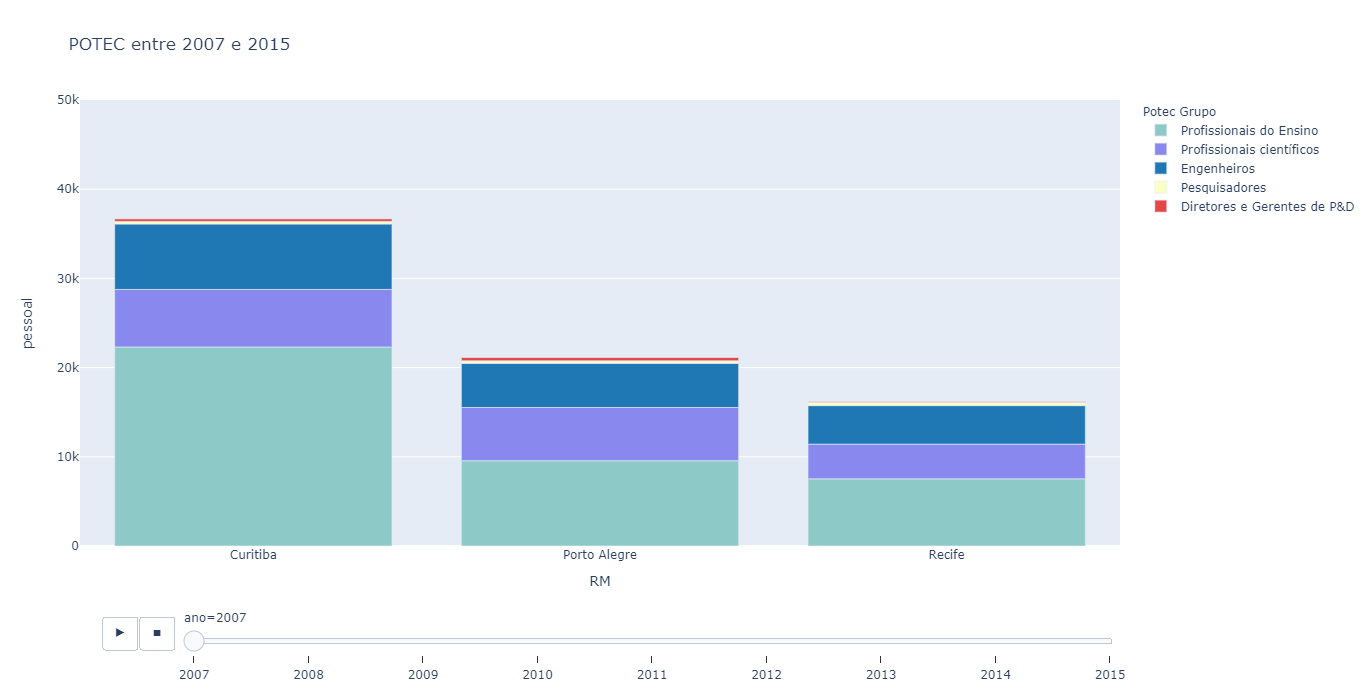

In [7]:
potec.plot_potec_evolution(df_evolution_wide, dynamic=True, data_format='wide')

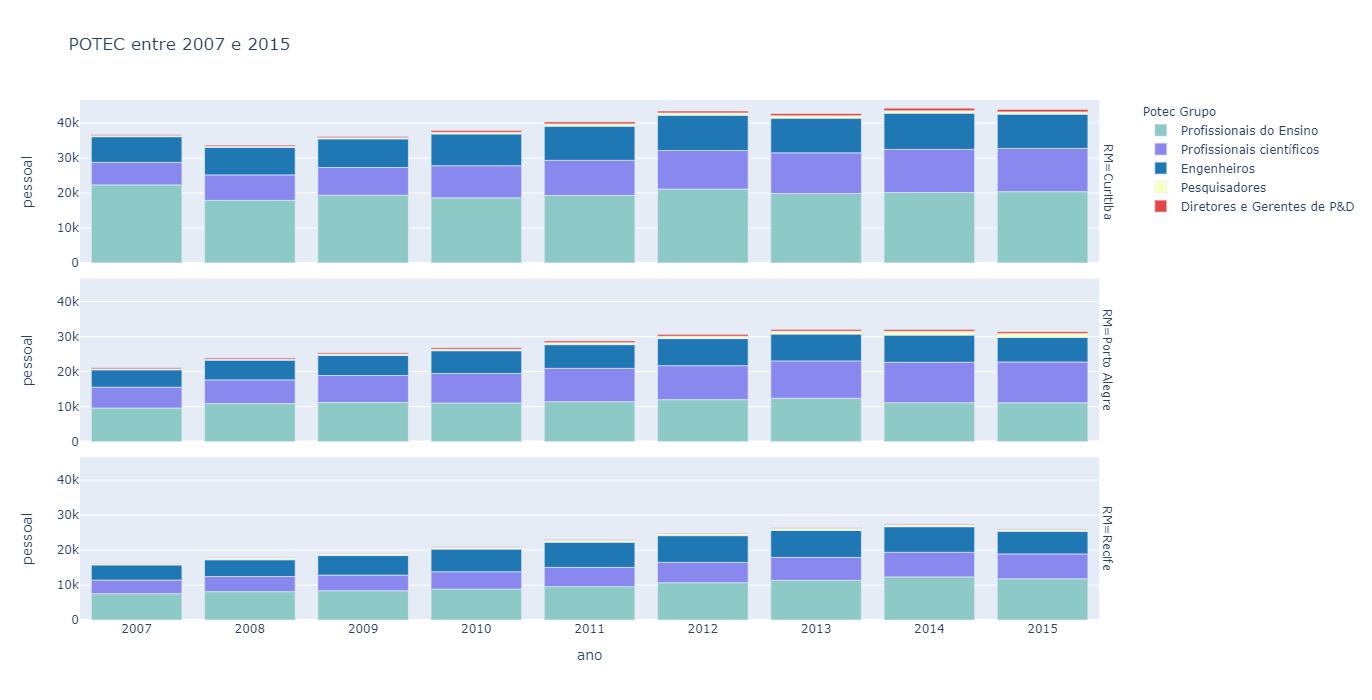

In [8]:
potec.plot_potec_evolution(df_evolution_wide, dynamic=False, data_format='wide')

In [9]:
df_rm_compare_wide = potec.potec_rm_compare()
df_rm_compare_wide.head()

Curitiba  \
Tipo de Ocupação Potec Grupo               Potec                                          
POTEC            Profissionais do Ensino   Professores de ensino superior         18590   
                                           Professores de ensino Profissional      1782   
                 Profissionais científicos Biólogos e biomédicos                    515   
                                           Físicos, químicos e afins              318   
                                           Profissionais da Informática           11332   

                                                                               Porto Alegre  \
Tipo de Ocupação Potec Grupo               Potec                                              
POTEC            Profissionais do Ensino   Professores de ensino superior              9628   
                                           Professores de ensino Profissional          1435   
                 Profissionais científicos Biólogos e biomédicos                        605   
                                           Físicos, químicos e afins                  411   
                                           Profissionais da Informática               10444   

                                                                               Recife  
Tipo de Ocupação Potec Grupo               Potec                                       
POTEC            Profissionais do Ensino   Professores de ensino superior        9944  
                                           Professores de ensino Profissional    1841  
                 Profissionais científicos Biólogos e biomédicos                  423  
                                           Físicos, químicos e afins            304  
                                           Profissionais da Informática          6130

In [10]:
df_rm_compare_long = potec.potec_rm_compare(data_format='long')

df_rm_compare_long.head()

Potec Grupo                               Potec        RM  \
0    Profissionais do Ensino      Professores de ensino superior  Curitiba   
1    Profissionais do Ensino  Professores de ensino Profissional  Curitiba   
2  Profissionais científicos               Biólogos e biomédicos  Curitiba   
3  Profissionais científicos         Físicos, químicos e afins  Curitiba   
4  Profissionais científicos        Profissionais da Informática  Curitiba   

   Pessoal  
0    18590  
1     1782  
2      515  
3      318  
4    11332

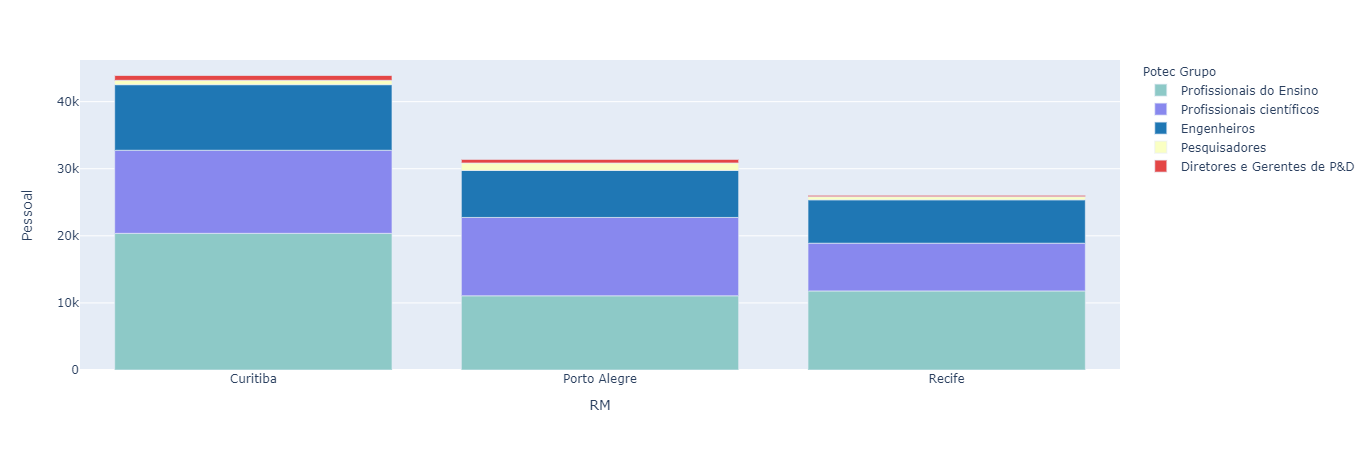

In [11]:
potec.plot_potec_rm_compare(df_rm_compare_long, data_format='long')

In [13]:
df_prop_uf_wide = potec.potec_proporcao_rm_uf(tidy=False)
df_prop_uf_wide

UF         territorio_tese      Tipo Pessoal                  Potec Grupo  \
0   PR      Restante do Paraná             POTEC  Diretores e Gerentes de P&D   
1   PR      Restante do Paraná             POTEC                  Engenheiros   
2   PR      Restante do Paraná             POTEC                  Engenheiros   
3   PR      Restante do Paraná             POTEC                  Engenheiros   
4   PR      Restante do Paraná             POTEC                Pesquisadores   
..  ..                     ...               ...                          ...   
73  PE  Restante de Pernambuco             POTEC    Profissionais científicos   
74  PE  Restante de Pernambuco             POTEC    Profissionais científicos   
75  PE  Restante de Pernambuco             POTEC      Profissionais do Ensino   
76  PE  Restante de Pernambuco             POTEC      Profissionais do Ensino   
77  PE  Restante de Pernambuco  Demais Ocupações             Demais Ocupações   

                                                potec  Pessoal  
0                         Diretores e Gerentes de P&D      332  
1                            Engenheiros Mecatrônicos       53  
2                               Engenheiros Civis etc     4371  
3   Engenheiros agrônomos, de alimentos, florestai...     2046  
4                                       Pesquisadores      367  
..                                                ...      ...  
73                        Físicos, químicos e afins       73  
74                              Biólogos e biomédicos      191  
75                 Professores de ensino Profissional     1476  
76                     Professores de ensino superior     4516  
77                                   Demais Ocupações   575641  

[78 rows x 6 columns]

In [14]:
df_prop_uf_long = potec.potec_proporcao_rm_uf(tidy=True)
df_prop_uf_long

UF                       territorio_tese  Pessoal
0  PE        Espaço Metropolitano de Recife    26040
1  PE                Restante de Pernambuco     7921
2  PR      Espaço Metropolitano de Curitiba    43897
3  PR                    Restante do Paraná    39296
4  RS  Espaço Metropolitano de Porto Alegre    31390
5  RS         Restante do Rio Grande do Sul    27008

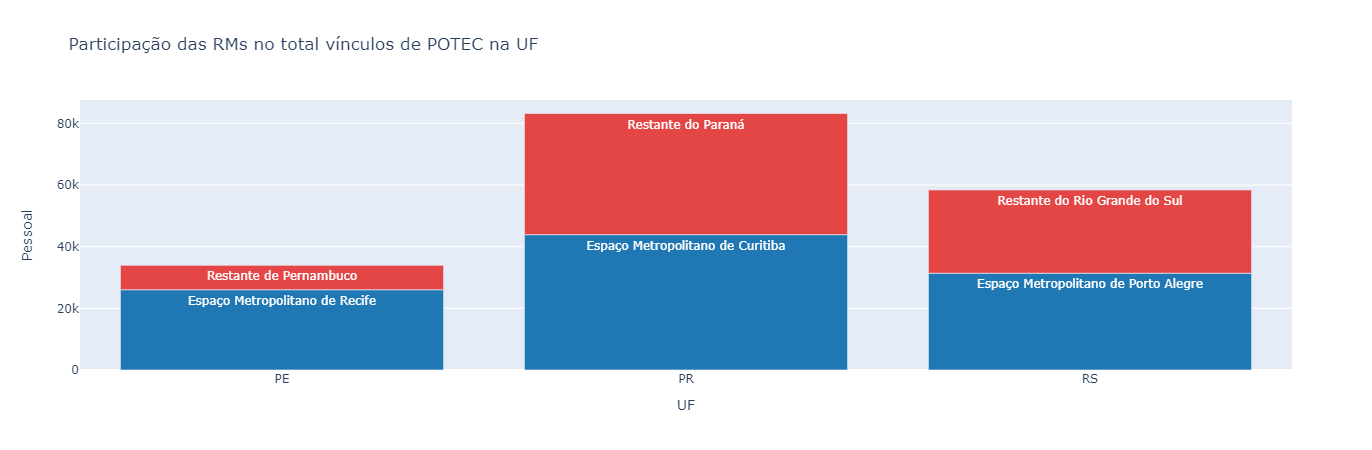

In [16]:
potec.plot_potec_proporcao_rm_uf(df_prop_uf_long, data_format='long')

In [17]:
df_potec_agg = potec.aggregate_potec()

In [18]:
df_potec_agg

PO Metropolitano  \
                                     potec                                                                  
Espaço Metropolitano de Curitiba     Engenheiros Mecatrônicos                                          96   
                                     Engenheiros Civis etc                                           8539   
                                     Engenheiros agrônomos, de alimentos, florestais...              1140   
                                     Pesquisadores                                                    648   
                                     Biotecnologistas, geneticistas, pesquisadores e...                77   
                                     Matemáticos, estatísticos e afins                              141   
                                     Profissionais da Informática                                   11332   
                                     Físicos, químicos e afins                                      318   
                                     Biólogos e biomédicos                                            515   
                                     Professores de ensino Profissional                              1782   
                                     Professores de ensino superior                                 18590   
                                     Demais Ocupações                                             1179123   
Espaço Metropolitano de Porto Alegre Engenheiros Mecatrônicos                                          60   
                                     Engenheiros Civis etc                                           5942   
                                     Engenheiros agrônomos, de alimentos, florestais...              1001   
                                     Pesquisadores                                                   1111   
                                     Biotecnologistas, geneticistas, pesquisadores e...                85   
                                     Matemáticos, estatísticos e afins                              132   
                                     Profissionais da Informática                                   10444   
                                     Físicos, químicos e afins                                      411   
                                     Biólogos e biomédicos                                            605   
                                     Professores de ensino Profissional                              1435   
                                     Professores de ensino superior                                  9628   
                                     Demais Ocupações                                             1322083   
Espaço Metropolitano de Recife       Engenheiros Mecatrônicos                                          30   
                                     Engenheiros Civis etc                                           5955   
                                     Engenheiros agrônomos, de alimentos, florestais...               481   
                                     Pesquisadores                                                    460   
                                     Biotecnologistas, geneticistas, pesquisadores e...                57   
                                     Matemáticos, estatísticos e afins                              203   
                                     Profissionais da Informática                                    6130   
                                     Físicos, químicos e afins                                      304   
                                     Biólogos e biomédicos                                            423   
                                     Professores de ensino Profissional                              1841   
                                     Professores de ensino superior                                  9944   
                                     Demais Ocupações   

In [27]:
def potec_x_sectors(ufs = ('pr', 'rs', 'pe'), year = 2015, data_format='wide'):
    
    multi_index=True
    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    for uf in ufs:

        df = pd.read_csv(
            f'app_rais/data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=[
                'territorio_tese'
#                , 'Município'                
#                , 'CBO Ocupação 2002'
#                , 'CNAE 2.0 Classe'
#                , 'Faixa Tempo Emprego'
#                , 'Escolaridade após 2005'
#                , 'Natureza Jurídica'
#                , 'Tamanho Estabelecimento'
#                , 'Tipo Estab'
                , 'knowledge_services'
                , 'technology_industries'
                , 'potec']
        )
        
        
#        df['UF'] = uf.upper()
        
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
        filter_potec = df.potec != df.potec.cat.categories[-1]
        df = df.loc[filter_rm_territory & filter_potec, :].groupby(by=['territorio_tese', 'potec', 'knowledge_services', 'technology_industries'], observed=True).size().reset_index()
        
        dict_df[uf] = df

        
    df = pd.concat(dict_df.values(),  axis=0)
    df.rename(columns={0: 'Pessoal'}, inplace=True)
    
    df.territorio_tese = df.territorio_tese.astype('category')
#    df.UF = df.UF.astype('category')
    
    df['Sectors'] = df.knowledge_services.map({'Without Classification':'Without Classification'}).fillna('Services')
    
    df['Sectors'] = ['Services' if x[1]['Sectors'] == 'Services' else 'Industry' if x[1]['technology_industries'] != 'Without Classification' and x[1]['Sectors'] != 'Services'  else 'Without Classification' for x in df.iterrows()]
    
    df = df.pivot_table(columns='Sectors', index=['territorio_tese'], values='Pessoal', aggfunc='sum')
    
    
    
    df = df.reset_index().rename(columns={'territorio_tese':'Espaço Metropolitano'})
    df['Espaço Metropolitano'] = df['Espaço Metropolitano'].str.slice_replace(start=0, stop=24)
    
    if data_format == 'wide':
        df.rename_axis(columns={'Sectors':''}, inplace=True)
    
    elif data_format == 'long':
        df = df.melt(id_vars='Espaço Metropolitano', var_name='Sector', value_name='POTEC')
    
    return df

In [15]:
df = potec_x_sectors(data_format='long')

In [16]:
df

Espaço Metropolitano                  Sector  POTEC
0             Curitiba                Industry   5111
1         Porto Alegre                Industry   3602
2               Recife                Industry   1213
3             Curitiba                Services  36141
4         Porto Alegre                Services  26064
5               Recife                Services  21876
6             Curitiba  Without Classification   2645
7         Porto Alegre  Without Classification   1724
8               Recife  Without Classification   2951

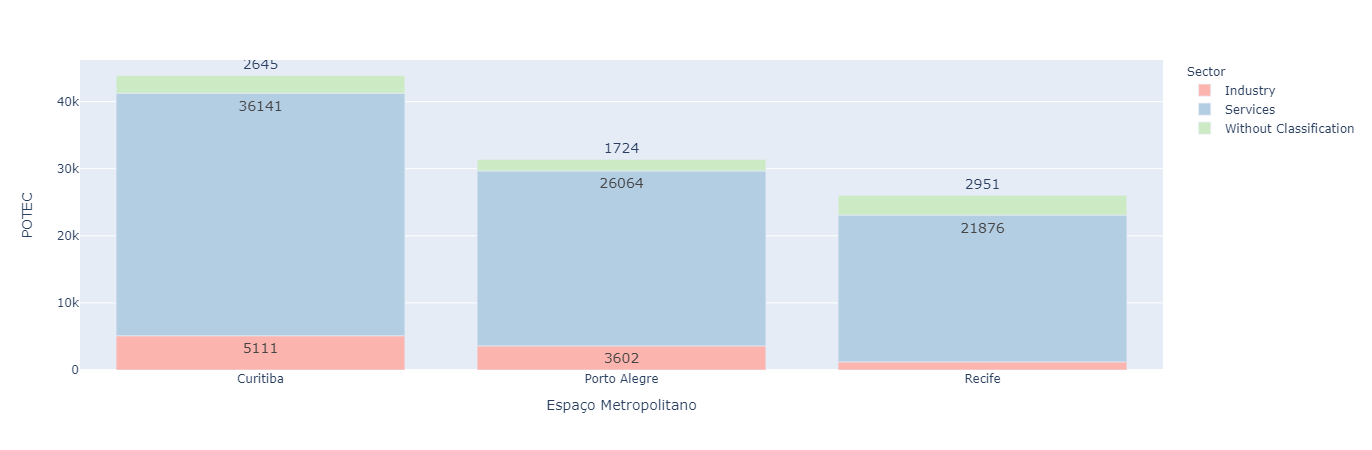

In [17]:
fig = px.bar(data_frame=df, x='Espaço Metropolitano', y='POTEC', color='Sector', text='POTEC', color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.update_traces(textposition='auto')

In [200]:
df = potec_x_sectors(data_format='wide')
df

Espaço Metropolitano  Industry  Services  Without Classification
0             Curitiba      5111     36141                    2645
1         Porto Alegre      3602     26064                    1724
2               Recife      1213     21876                    2951

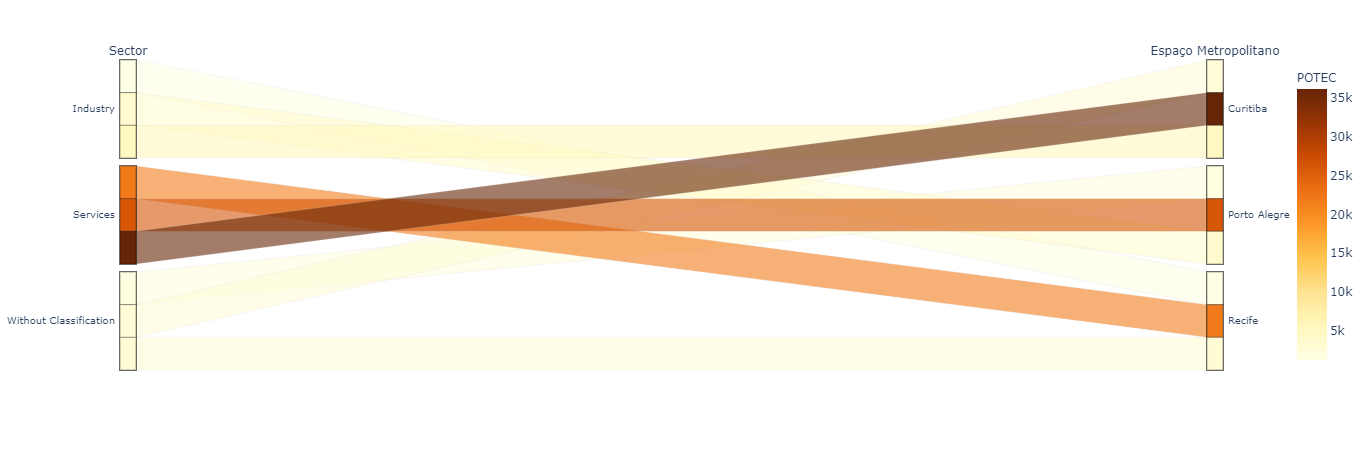

In [24]:
px.parallel_categories(df[['Sector', 'Espaço Metropolitano', 'POTEC']], color='POTEC', dimensions=['Sector', 'Espaço Metropolitano'], color_continuous_scale=px.colors.sequential.YlOrBr)

In [94]:
def potec_x_ind_tec(ufs = ('pr', 'rs', 'pe'), year = 2015, data_format='wide'):
    
    multi_index=True
    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    for uf in ufs:

        df = pd.read_csv(
            f'app_rais/data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=[
                'territorio_tese'
#                , 'Município'                
#                , 'CBO Ocupação 2002'
#                , 'CNAE 2.0 Classe'
#                , 'Faixa Tempo Emprego'
#                , 'Escolaridade após 2005'
#                , 'Natureza Jurídica'
#                , 'Tamanho Estabelecimento'
#                , 'Tipo Estab'
#                , 'knowledge_services'
                , 'technology_industries'
                , 'potec']
        )
        
        
#        df['UF'] = uf.upper()
        
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
        filter_potec = df.potec != df.potec.cat.categories[-1]
        filter_industry = df.technology_industries != df.technology_industries.cat.categories[4]
        df = df.loc[filter_rm_territory & filter_potec & filter_industry, :].groupby(by=['territorio_tese', 'potec', 'technology_industries'], observed=True).size().reset_index()
        
        dict_df[uf] = df

        
    df = pd.concat(dict_df.values(),  axis=0)
    
    df = df.groupby(by=['territorio_tese', 'technology_industries'], observed=True).sum().reset_index().rename(columns={0:'POTEC', 'territorio_tese': 'Espaços Metropolitanos', 'technology_industries': 'Nível Tecnológico'})
    
    df['Espaços Metropolitanos'] = df['Espaços Metropolitanos'].str.slice_replace(start=0, stop=24)

    if data_format == 'wide':
        df = df.pivot_table(columns='Espaços Metropolitanos', index='Nível Tecnológico').rename_axis(columns={'Espaços Metropolitanos':''}).droplevel(0, axis=1)    
    
    elif data_format == 'long':
        df = df
    

    
#    df.rename(columns={0: 'Pessoal'}, inplace=True)
    
#    df.territorio_tese = df.territorio_tese.astype('category')
#    df.UF = df.UF.astype('category')
    
#    df['Sectors'] = df.knowledge_services.map({'Without Classification':'Without Classification'}).fillna('Services')
    
#    df['Sectors'] = ['Services' if x[1]['Sectors'] == 'Services' else 'Industry' if x[1]['technology_industries'] != 'Without Classification' and x[1]['Sectors'] != 'Services'  else 'Without Classification' for x in df.iterrows()]
    
#    df = df.pivot_table(columns='Sectors', index=['territorio_tese'], values='Pessoal', aggfunc='sum')
    
    
    
#    df = df.reset_index().rename(columns={'territorio_tese':'Espaço Metropolitano'})
#    df['Espaço Metropolitano'] = df['Espaço Metropolitano'].str.slice_replace(start=0, stop=24)
    

    
#    elif data_format == 'long':
#        df = df.melt(id_vars='Espaço Metropolitano', var_name='Sector', value_name='POTEC')
    
    return df

In [115]:
df = potec_x_ind_tec(data_format='long')

In [116]:
df

Espaços Metropolitanos       Nível Tecnológico  POTEC
0                Curitiba         High-technology    416
1                Curitiba  Medium-high-technology   3637
2                Curitiba   Medium-low-technology    639
3                Curitiba          Low-technology    419
4            Porto Alegre         High-technology    721
5            Porto Alegre  Medium-high-technology   1509
6            Porto Alegre   Medium-low-technology    701
7            Porto Alegre          Low-technology    671
8                  Recife         High-technology     54
9                  Recife  Medium-high-technology    344
10                 Recife   Medium-low-technology    532
11                 Recife          Low-technology    283

In [97]:
df = potec_x_ind_tec(data_format='long')

In [98]:
df

Espaços Metropolitanos       Nível Tecnológico  POTEC
0                Curitiba         High-technology    416
1                Curitiba  Medium-high-technology   3637
2                Curitiba   Medium-low-technology    639
3                Curitiba          Low-technology    419
4            Porto Alegre         High-technology    721
5            Porto Alegre  Medium-high-technology   1509
6            Porto Alegre   Medium-low-technology    701
7            Porto Alegre          Low-technology    671
8                  Recife         High-technology     54
9                  Recife  Medium-high-technology    344
10                 Recife   Medium-low-technology    532
11                 Recife          Low-technology    283

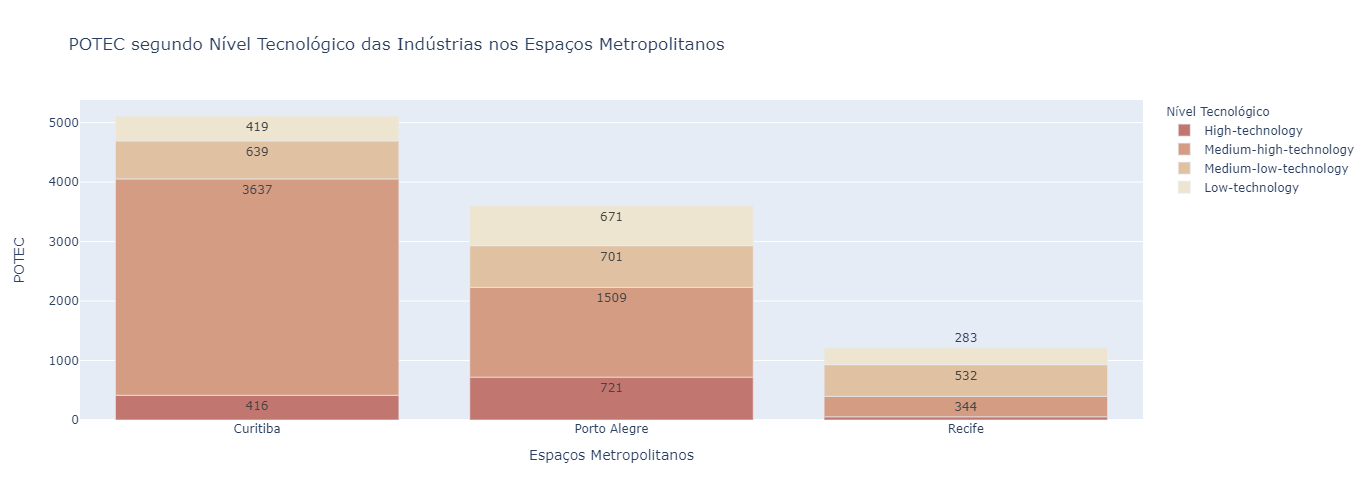

In [110]:
fig = px.bar(
    data_frame=df
    , x='Espaços Metropolitanos'
    , y='POTEC'
    , color='Nível Tecnológico'
    , text='POTEC'
    , color_discrete_sequence=[
        'rgb(193, 118, 111)'
        , 'rgb(211, 156, 131)'
        , 'rgb(224, 194, 162)'
        ,'rgb(237, 229, 207)'
    ]
    , title='POTEC segundo Nível Tecnológico das Indústrias nos Espaços Metropolitanos'
    , height=500


)

fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_traces(textposition='auto')

In [111]:
def potec_x_services_knowledge(ufs = ('pr', 'rs', 'pe'), year = 2015, data_format='wide'):
    
    multi_index=True
    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    for uf in ufs:

        df = pd.read_csv(
            f'app_rais/data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=[
                'territorio_tese'
#                , 'Município'                
#                , 'CBO Ocupação 2002'
#                , 'CNAE 2.0 Classe'
#                , 'Faixa Tempo Emprego'
#                , 'Escolaridade após 2005'
#                , 'Natureza Jurídica'
#                , 'Tamanho Estabelecimento'
#                , 'Tipo Estab'
                , 'knowledge_services'
#                , 'technology_industries'
                , 'potec']
        )
        
        
#        df['UF'] = uf.upper()
        
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
        filter_potec = df.potec != df.potec.cat.categories[-1]
        filter_services = df.knowledge_services != df.knowledge_services.cat.categories[6]  
        df = df.loc[filter_rm_territory & filter_potec & filter_services, :].groupby(by=['territorio_tese', 'potec', 'knowledge_services'], observed=True).size().reset_index()
        
        dict_df[uf] = df

        
    df = pd.concat(dict_df.values(),  axis=0)
    
    df = df.groupby(by=['territorio_tese', 'knowledge_services'], observed=True).sum().reset_index().rename(columns={0:'POTEC', 'territorio_tese': 'Espaços Metropolitanos', 'knowledge_services': 'Intensidade de Conhecimento'})
    
    df['Espaços Metropolitanos'] = df['Espaços Metropolitanos'].str.slice_replace(start=0, stop=24)

    if data_format == 'wide':
        df = df.pivot_table(columns='Espaços Metropolitanos', index='Intensidade de Conhecimento').rename_axis(columns={'Espaços Metropolitanos':''}).droplevel(0, axis=1)    
    
    elif data_format == 'long':
        df = df
    

    
#    df.rename(columns={0: 'Pessoal'}, inplace=True)
    
#    df.territorio_tese = df.territorio_tese.astype('category')
#    df.UF = df.UF.astype('category')
    
#    df['Sectors'] = df.knowledge_services.map({'Without Classification':'Without Classification'}).fillna('Services')
    
#    df['Sectors'] = ['Services' if x[1]['Sectors'] == 'Services' else 'Industry' if x[1]['technology_industries'] != 'Without Classification' and x[1]['Sectors'] != 'Services'  else 'Without Classification' for x in df.iterrows()]
    
#    df = df.pivot_table(columns='Sectors', index=['territorio_tese'], values='Pessoal', aggfunc='sum')
    
    
    
#    df = df.reset_index().rename(columns={'territorio_tese':'Espaço Metropolitano'})
#    df['Espaço Metropolitano'] = df['Espaço Metropolitano'].str.slice_replace(start=0, stop=24)
    

    
#    elif data_format == 'long':
#        df = df.melt(id_vars='Espaço Metropolitano', var_name='Sector', value_name='POTEC')
    
    return df

In [120]:
df = potec_x_services_knowledge(data_format='long')

In [121]:
df

Espaços Metropolitanos               Intensidade de Conhecimento  POTEC
0                Curitiba        Other knowledge-intensive services  22860
1                Curitiba  Less knowledge-intensive market services   2733
2                Curitiba    High-tech knowledge-intensive services   5749
3                Curitiba   Other less knowledge-intensive services   1057
4                Curitiba       Knowledge-intensive market services   2451
5                Curitiba    Knowledge-intensive financial services   1291
6            Porto Alegre        Other knowledge-intensive services  14840
7            Porto Alegre  Less knowledge-intensive market services   3092
8            Porto Alegre    High-tech knowledge-intensive services   5785
9            Porto Alegre   Other less knowledge-intensive services    469
10           Porto Alegre       Knowledge-intensive market services   1351
11           Porto Alegre    Knowledge-intensive financial services    527
12                 Recife        Other knowledge-intensive services  14168
13                 Recife  Less knowledge-intensive market services   2134
14                 Recife    High-tech knowledge-intensive services   2800
15                 Recife   Other less knowledge-intensive services    756
16                 Recife       Knowledge-intensive market services   1840
17                 Recife    Knowledge-intensive financial services    178

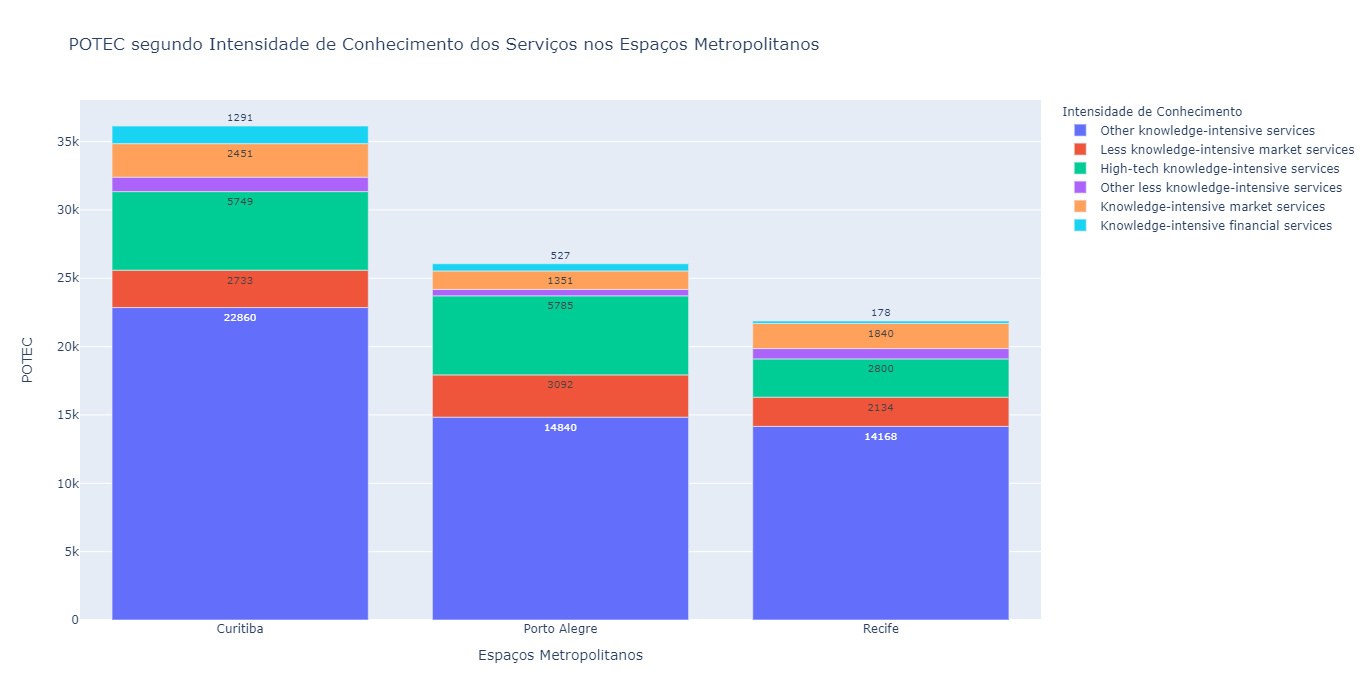

In [132]:
fig = px.bar(
    data_frame=df
    , x='Espaços Metropolitanos'
    , y='POTEC'
    , color='Intensidade de Conhecimento'
    , text='POTEC'
#    , color_discrete_sequence= px.colors.sequential.BuPu
    , title='POTEC segundo Intensidade de Conhecimento dos Serviços nos Espaços Metropolitanos'
    , height=700


)

fig.update_layout(
    uniformtext_minsize=8
    , uniformtext_mode='hide'
)
fig.update_traces(textposition='outside')

In [80]:
def potec_x_organization_size(ufs = ('pr', 'rs', 'pe'), year = 2015, data_format='wide'):
    
    multi_index=True
    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    for uf in ufs:

        df = pd.read_csv(
            f'app_rais/data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=[
                'territorio_tese'
#                , 'Município'                
#                , 'CBO Ocupação 2002'
#                , 'CNAE 2.0 Classe'
#                , 'Faixa Tempo Emprego'
#                , 'Escolaridade após 2005'
#                , 'Natureza Jurídica'
                , 'Tamanho Estabelecimento'
#                , 'Tipo Estab'
#                , 'knowledge_services'
#                , 'technology_industries'
                , 'potec']
        )
        
        
#        df['UF'] = uf.upper()
        
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
        filter_potec = df.potec != df.potec.cat.categories[-1]
#        filter_services = df.knowledge_services != df.knowledge_services.cat.categories[6]  
        df = df.loc[filter_rm_territory & filter_potec, :].groupby(by=['territorio_tese', 'Tamanho Estabelecimento', 'potec'], observed=True).size().reset_index()
        
        dict_df[uf] = df

        
    df = pd.concat(dict_df.values(),  axis=0)
    
    df['Tamanho Estabelecimento'] = df['Tamanho Estabelecimento'].map(dict_porte).astype(type_porte)
    
    df.rename(columns={'territorio_tese': 'Espaço Metropolitano', 0:'Pessoal'}, inplace=True)
    
    df['Espaço Metropolitano'] = df['Espaço Metropolitano'].str.slice_replace(start=0, stop=24)
    
    df['Potec Grupo'] = df['potec'].map(dict_potec)

    df = df[['Espaço Metropolitano', 'Tamanho Estabelecimento','Potec Grupo', 'potec', 'Pessoal']]
    
#    df = df.groupby(by=['territorio_tese', 'knowledge_services'], observed=True).sum().reset_index().rename(columns={0:'POTEC', 'territorio_tese': 'Espaços Metropolitanos', 'knowledge_services': 'Intensidade de Conhecimento'})
    
#    df['Espaços Metropolitanos'] = df['Espaços Metropolitanos'].str.slice_replace(start=0, stop=24)

#    if data_format == 'wide':
#        df = df.pivot_table(columns='Espaços Metropolitanos', index='Intensidade de Conhecimento').rename_axis(columns={'Espaços Metropolitanos':''}).droplevel(0, axis=1)    
    
#    elif data_format == 'long':
#        df = df
    

    
#    df.rename(columns={0: 'Pessoal'}, inplace=True)
    
#    df.territorio_tese = df.territorio_tese.astype('category')
#    df.UF = df.UF.astype('category')
    
#    df['Sectors'] = df.knowledge_services.map({'Without Classification':'Without Classification'}).fillna('Services')
    
#    df['Sectors'] = ['Services' if x[1]['Sectors'] == 'Services' else 'Industry' if x[1]['technology_industries'] != 'Without Classification' and x[1]['Sectors'] != 'Services'  else 'Without Classification' for x in df.iterrows()]
    
#    df = df.pivot_table(columns='Sectors', index=['territorio_tese'], values='Pessoal', aggfunc='sum')
    
    
    
#    df = df.reset_index().rename(columns={'territorio_tese':'Espaço Metropolitano'})
#    df['Espaço Metropolitano'] = df['Espaço Metropolitano'].str.slice_replace(start=0, stop=24)
    

    
#    elif data_format == 'long':
#        df = df.melt(id_vars='Espaço Metropolitano', var_name='Sector', value_name='POTEC')
    
    return df

In [51]:
df = potec_x_organization_size()

In [52]:
df

Espaço Metropolitano Tamanho Estabelecimento                  Potec Grupo  \
0               Curitiba                  Até 49  Diretores e Gerentes de P&D   
1               Curitiba                  Até 49                  Engenheiros   
2               Curitiba                  Até 49                  Engenheiros   
3               Curitiba                  Até 49                  Engenheiros   
4               Curitiba                  Até 49                Pesquisadores   
..                   ...                     ...                          ...   
102               Recife        a partir de 1000    Profissionais científicos   
103               Recife        a partir de 1000    Profissionais científicos   
104               Recife        a partir de 1000    Profissionais científicos   
105               Recife        a partir de 1000      Profissionais do Ensino   
106               Recife        a partir de 1000      Profissionais do Ensino   

                                                 potec  Pessoal  
0                          Diretores e Gerentes de P&D       19  
1                             Engenheiros Mecatrônicos        7  
2                                Engenheiros Civis etc      195  
3    Engenheiros agrônomos, de alimentos, florestai...       13  
4                                        Pesquisadores        3  
..                                                 ...      ...  
102                       Profissionais da Informática      490  
103                        Físicos, químicos e afins       72  
104                              Biólogos e biomédicos      175  
105                 Professores de ensino Profissional      327  
106                     Professores de ensino superior     4645  

[321 rows x 5 columns]

In [36]:
df = df.groupby(by=['Espaço Metropolitano', 'Tamanho Estabelecimento'], observed=True).sum().reset_index().rename(columns={0:'Pessoal'})

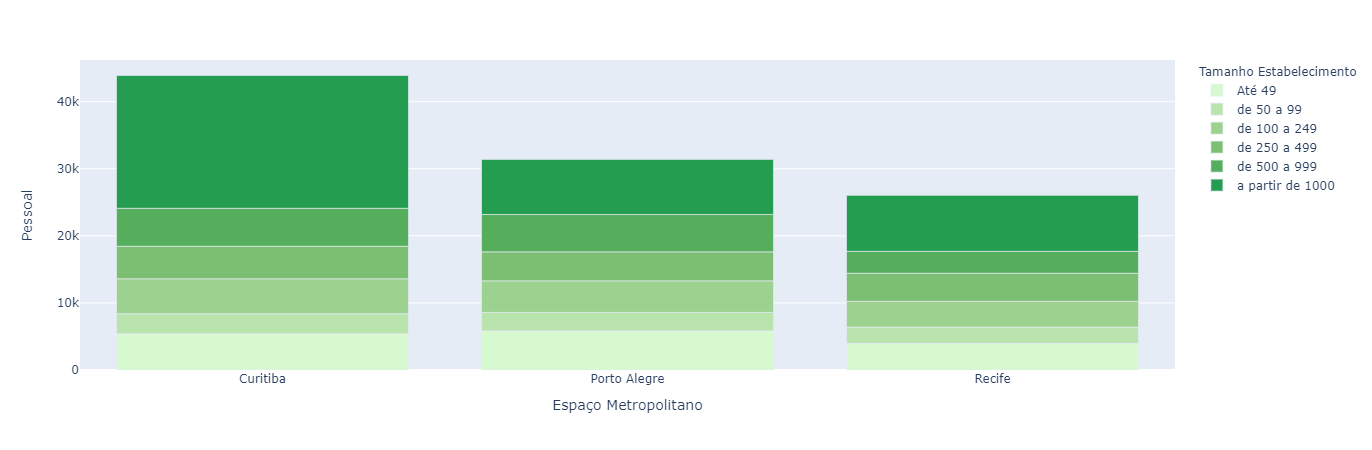

In [37]:
px.bar(data_frame=df.groupby(by=['Espaço Metropolitano', 'Tamanho Estabelecimento'], observed=True).sum().reset_index().rename(columns={0:'Pessoal'}), x='Espaço Metropolitano', y='Pessoal', color='Tamanho Estabelecimento', color_discrete_sequence=px.colors.sequential.algae)

In [4]:
def potec_x_nat_jur(ufs = ('pr', 'rs', 'pe'), year = 2015, data_format='wide'):
    
    multi_index=True
    dict_df = dict()
    dict_df_ufs = dict()
    dict_rms = {'PR': 'Curitiba', 'RS':'Porto Alegre', 'PE': 'Recife'}

    for uf in ufs:

        df = pd.read_csv(
            f'app_rais/data/rais_treated/{year}/{uf.upper()}{year}.zip'
            , compression='zip'
            , header=0
            , sep=';'
            , decimal=','
            , dtype=dic_dtype
            , usecols=[
                'territorio_tese'
#                , 'Município'                
#                , 'CBO Ocupação 2002'
#                , 'CNAE 2.0 Classe'
#                , 'Faixa Tempo Emprego'
#                , 'Escolaridade após 2005'
                , 'Natureza Jurídica'
#                , 'Tamanho Estabelecimento'
#                , 'Tipo Estab'
#                , 'knowledge_services'
#                , 'technology_industries'
                , 'potec']
        )
        
        
#        df['UF'] = uf.upper()
        
        filter_rm_territory = df.territorio_tese != df.territorio_tese.cat.categories[1]
        filter_potec = df.potec != df.potec.cat.categories[-1]
#        filter_services = df.knowledge_services != df.knowledge_services.cat.categories[6]  
        df = df.loc[filter_rm_territory & filter_potec, :].groupby(by=['territorio_tese', 'Natureza Jurídica', 'potec'], observed=True).size().reset_index()
        
        dict_df[uf] = df

        
    df = pd.concat(dict_df.values(),  axis=0)
    
    df['Natureza Jurídica Grupo'] = df['Natureza Jurídica'].map(dict_nat_jur).astype('category')
    df['Natureza Jurídica'] = df['Natureza Jurídica'].map(dict_nat_jur_detail).astype('category')
    
    df.rename(columns={'territorio_tese': 'Espaço Metropolitano', 0:'Pessoal'}, inplace=True)
        
    df['Espaço Metropolitano'] = df['Espaço Metropolitano'].str.slice_replace(start=0, stop=24)
    
    df['Potec Grupo'] = df['potec'].map(dict_potec)
    
    df = df[['Espaço Metropolitano', 'Natureza Jurídica Grupo', 'Natureza Jurídica', 'Potec Grupo', 'potec', 'Pessoal']]
    
#    df = df.groupby(by=['territorio_tese', 'knowledge_services'], observed=True).sum().reset_index().rename(columns={0:'POTEC', 'territorio_tese': 'Espaços Metropolitanos', 'knowledge_services': 'Intensidade de Conhecimento'})
    
#    df['Espaços Metropolitanos'] = df['Espaços Metropolitanos'].str.slice_replace(start=0, stop=24)

#    if data_format == 'wide':
#        df = df.pivot_table(columns='Espaços Metropolitanos', index='Intensidade de Conhecimento').rename_axis(columns={'Espaços Metropolitanos':''}).droplevel(0, axis=1)    
    
#    elif data_format == 'long':
#        df = df
    

    
#    df.rename(columns={0: 'Pessoal'}, inplace=True)
    
#    df.territorio_tese = df.territorio_tese.astype('category')
#    df.UF = df.UF.astype('category')
    
#    df['Sectors'] = df.knowledge_services.map({'Without Classification':'Without Classification'}).fillna('Services')
    
#    df['Sectors'] = ['Services' if x[1]['Sectors'] == 'Services' else 'Industry' if x[1]['technology_industries'] != 'Without Classification' and x[1]['Sectors'] != 'Services'  else 'Without Classification' for x in df.iterrows()]
    
#    df = df.pivot_table(columns='Sectors', index=['territorio_tese'], values='Pessoal', aggfunc='sum')
    
    
    
#    df = df.reset_index().rename(columns={'territorio_tese':'Espaço Metropolitano'})
#    df['Espaço Metropolitano'] = df['Espaço Metropolitano'].str.slice_replace(start=0, stop=24)
    

    
#    elif data_format == 'long':
#        df = df.melt(id_vars='Espaço Metropolitano', var_name='Sector', value_name='POTEC')
    
    return df

In [5]:
df = potec_x_nat_jur()

In [6]:
df

Espaço Metropolitano Natureza Jurídica Grupo Natureza Jurídica  \
0               Curitiba  Entidades Empresariais       SOC QT LTDA   
1               Curitiba  Entidades Empresariais       SOC QT LTDA   
2               Curitiba  Entidades Empresariais       SOC QT LTDA   
3               Curitiba  Entidades Empresariais       SOC QT LTDA   
4               Curitiba  Entidades Empresariais       SOC QT LTDA   
..                   ...                     ...               ...   
189               Recife   Administração Pública       POD EXEC FE   
190               Recife   Administração Pública       POD EXEC FE   
191               Recife   Administração Pública       POD LEG EST   
192               Recife   Administração Pública        AUTARQ MUN   
193               Recife  Entidades Empresariais   EMP IND SIMPLES   

                     Potec Grupo  \
0    Diretores e Gerentes de P&D   
1                    Engenheiros   
2                    Engenheiros   
3                    Engenheiros   
4                  Pesquisadores   
..                           ...   
189    Profissionais científicos   
190      Profissionais do Ensino   
191    Profissionais científicos   
192    Profissionais científicos   
193                  Engenheiros   

                                                 potec  Pessoal  
0                          Diretores e Gerentes de P&D      390  
1                             Engenheiros Mecatrônicos       57  
2                                Engenheiros Civis etc     3418  
3    Engenheiros agrônomos, de alimentos, florestai...       89  
4                                        Pesquisadores      386  
..                                                 ...      ...  
189                        Físicos, químicos e afins        1  
190                 Professores de ensino Profissional        1  
191                       Profissionais da Informática       30  
192                       Profissionais da Informática        1  
193                              Engenheiros Civis etc        4  

[598 rows x 6 columns]

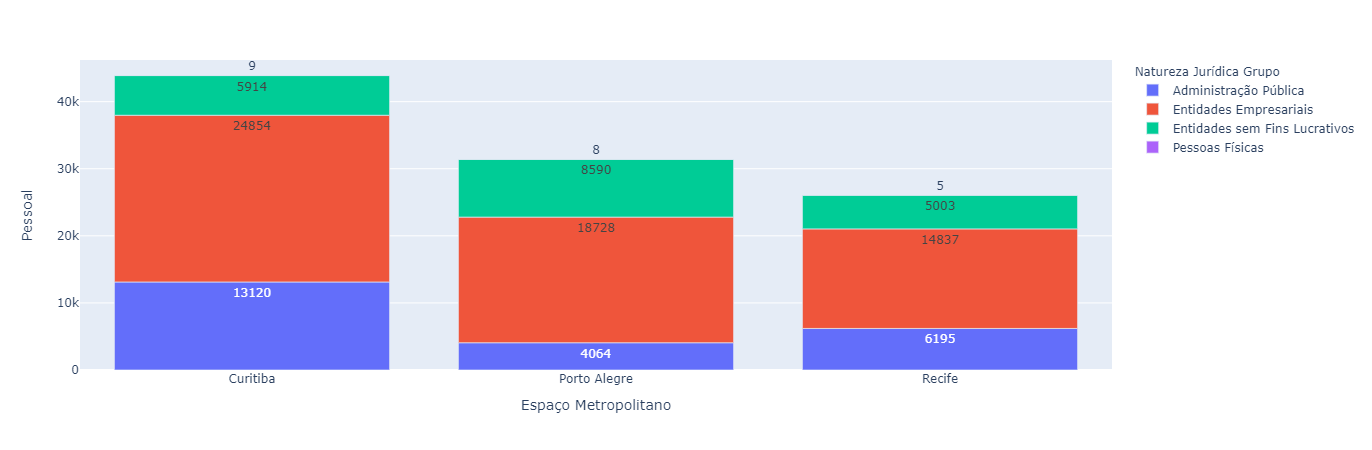

In [7]:
fig = px.bar(
    data_frame=df.groupby(['Espaço Metropolitano', 'Natureza Jurídica Grupo']).sum().reset_index()
    , x='Espaço Metropolitano'
    , y='Pessoal'
    , color='Natureza Jurídica Grupo'
    , text='Pessoal'
)

fig.update_layout(
    uniformtext_minsize=8
    , uniformtext_mode='hide'
)
fig.update_traces(textposition='outside')

In [22]:
df

Espaço Metropolitano Natureza Jurídica Grupo Natureza Jurídica  \
0               Curitiba  Entidades Empresariais       SOC QT LTDA   
1               Curitiba  Entidades Empresariais       SOC QT LTDA   
2               Curitiba  Entidades Empresariais       SOC QT LTDA   
3               Curitiba  Entidades Empresariais       SOC QT LTDA   
4               Curitiba  Entidades Empresariais       SOC QT LTDA   
..                   ...                     ...               ...   
189               Recife   Administração Pública       POD EXEC FE   
190               Recife   Administração Pública       POD EXEC FE   
191               Recife   Administração Pública       POD LEG EST   
192               Recife   Administração Pública        AUTARQ MUN   
193               Recife  Entidades Empresariais   EMP IND SIMPLES   

                     Potec Grupo  \
0    Diretores e Gerentes de P&D   
1                    Engenheiros   
2                    Engenheiros   
3                    Engenheiros   
4                  Pesquisadores   
..                           ...   
189    Profissionais científicos   
190      Profissionais do Ensino   
191    Profissionais científicos   
192    Profissionais científicos   
193                  Engenheiros   

                                                 potec  Pessoal Nat Jurídica  \
0                          Diretores e Gerentes de P&D      390     Empresas   
1                             Engenheiros Mecatrônicos       57     Empresas   
2                                Engenheiros Civis etc     3418     Empresas   
3    Engenheiros agrônomos, de alimentos, florestai...       89     Empresas   
4                                        Pesquisadores      386     Empresas   
..                                                 ...      ...          ...   
189                        Físicos, químicos e afins        1      Adm Púb   
190                 Professores de ensino Profissional        1      Adm Púb   
191                       Profissionais da Informática       30      Adm Púb   
192                       Profissionais da Informática        1      Adm Púb   
193                              Engenheiros Civis etc        4     Empresas   

       POTEC Group  
0      Dir/Ger P&D  
1      Engenheiros  
2      Engenheiros  
3      Engenheiros  
4    Pesquisadores  
..             ...  
189    Pro. Cient.  
190   Prof. Ensino  
191    Pro. Cient.  
192    Pro. Cient.  
193    Engenheiros  

[598 rows x 8 columns]

In [41]:
px.colors.qualitative.Plotly

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

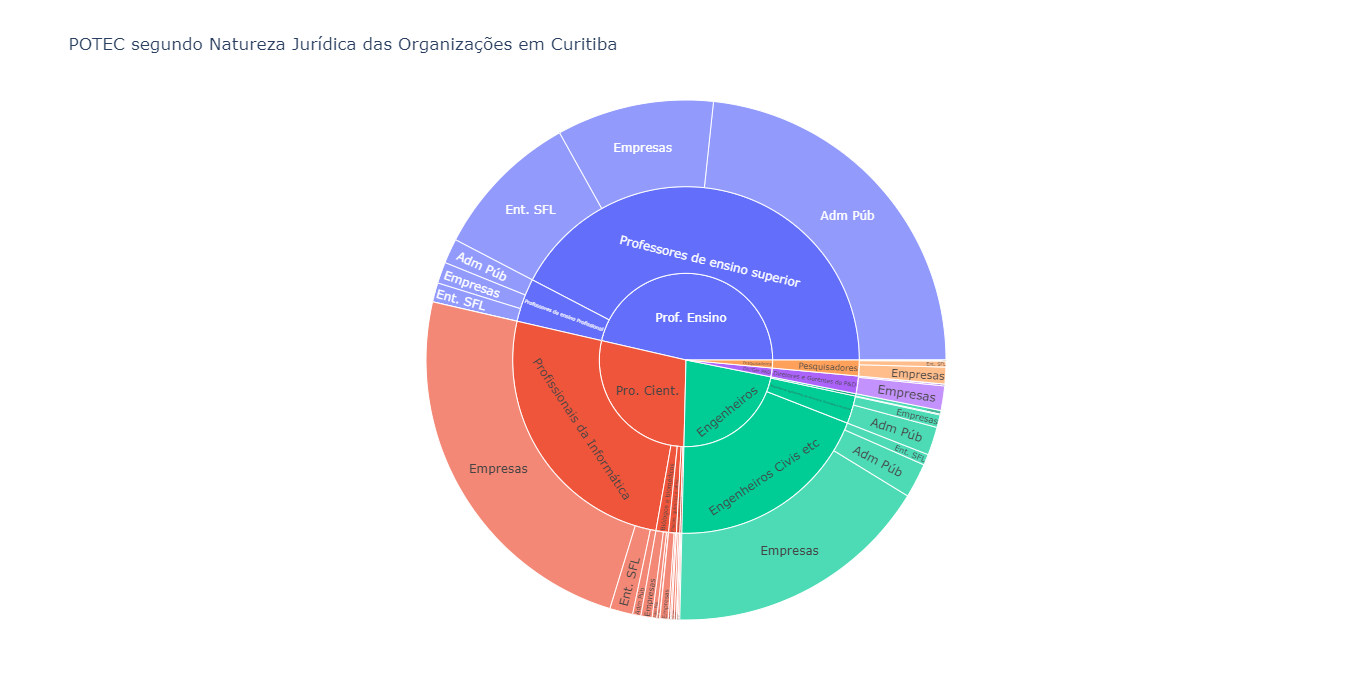

In [43]:
df['Nat Jurídica'] = df['Natureza Jurídica Grupo'].map({'Entidades Empresariais': 'Empresas', 'Entidades sem Fins Lucrativos': 'Ent. SFL', 'Administração Pública': 'Adm Púb', 'Pessoas Físicas': 'PF'})

df['POTEC Group'] = df['Potec Grupo'].map({'Diretores e Gerentes de P&D':'Dir/Ger P&D', 'Engenheiros':'Engenheiros', 'Pesquisadores':'Pesquisadores','Profissionais científicos':'Pro. Cient.', 'Profissionais do Ensino':'Prof. Ensino'})

fig = px.sunburst(
    data_frame=df[df['Espaço Metropolitano'] == 'Curitiba']
    , path=['POTEC Group', 'potec', 'Nat Jurídica', ]
    , values='Pessoal'
    , height = 700
    , title = 'POTEC segundo Natureza Jurídica das Organizações em Curitiba'
)

#fig.update_layout(
#    uniformtext_minsize=9
#    , uniformtext_mode='hide'
#)

fig.show()

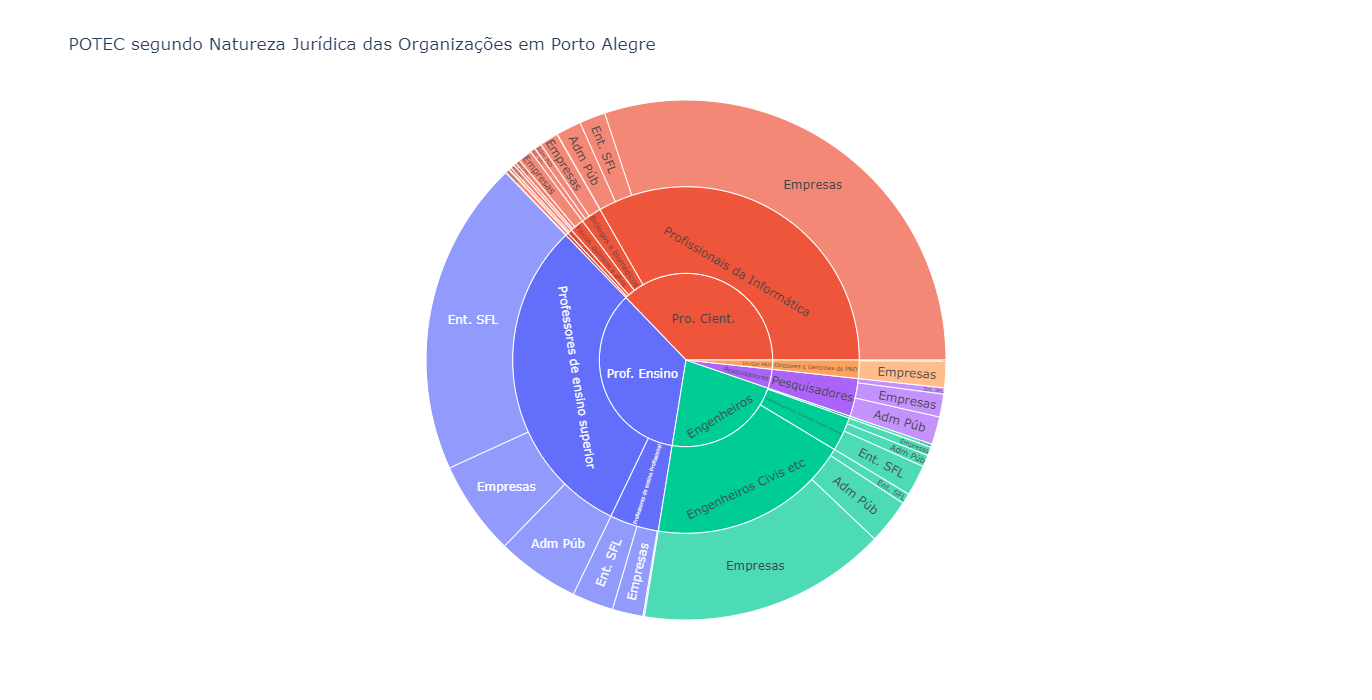

In [42]:
df['Nat Jurídica'] = df['Natureza Jurídica Grupo'].map({'Entidades Empresariais': 'Empresas', 'Entidades sem Fins Lucrativos': 'Ent. SFL', 'Administração Pública': 'Adm Púb', 'Pessoas Físicas': 'PF'})

df['POTEC Group'] = df['Potec Grupo'].map({'Diretores e Gerentes de P&D':'Dir/Ger P&D', 'Engenheiros':'Engenheiros', 'Pesquisadores':'Pesquisadores','Profissionais científicos':'Pro. Cient.', 'Profissionais do Ensino':'Prof. Ensino'})


# dá para inserir aqui um if que crie uma variável para color_discrete_sequence, a depender se a soma de uma categoria for maior do que a outra


fig = px.sunburst(
    data_frame=df[df['Espaço Metropolitano'] == 'Porto Alegre']
    , path=['POTEC Group', 'potec', 'Nat Jurídica', ]
    , values='Pessoal'
    , height = 700
    , title = 'POTEC segundo Natureza Jurídica das Organizações em Porto Alegre'
    ,color_discrete_sequence=['#EF553B', '#636EFA', '#00CC96', '#AB63FA', '#FFA15A']
)

fig.show()

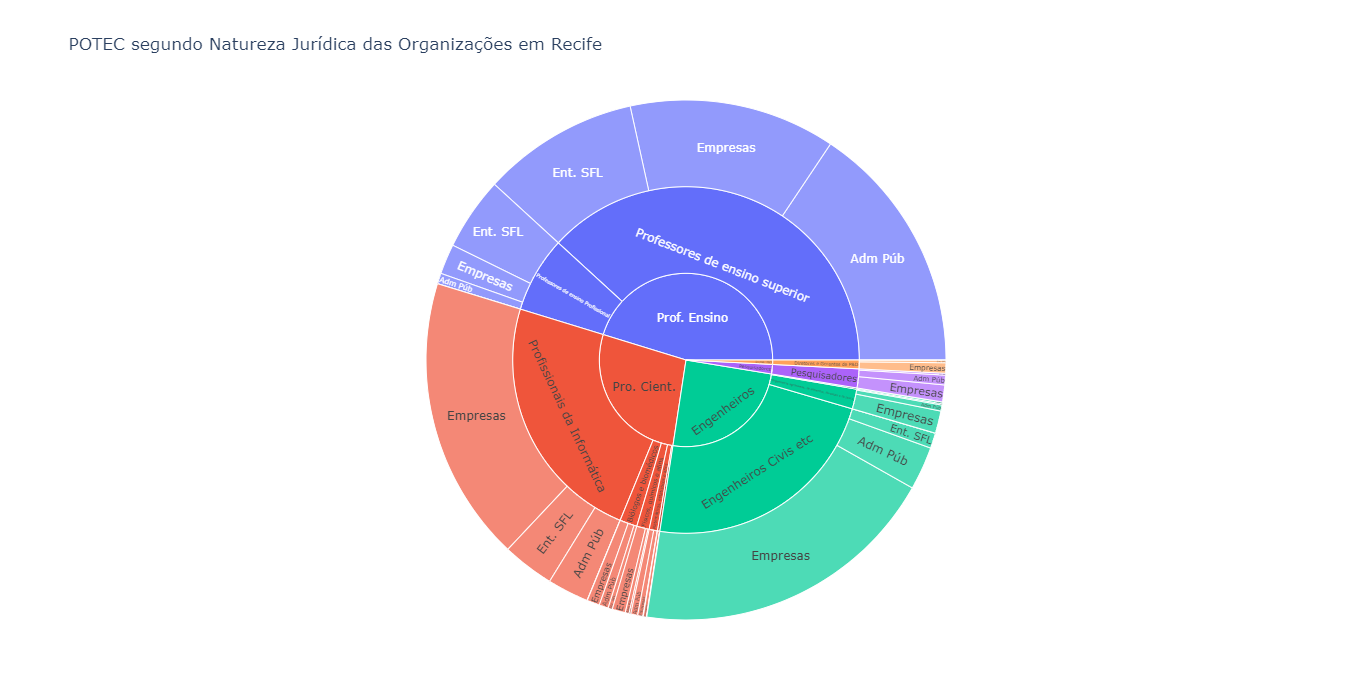

In [44]:
df['Nat Jurídica'] = df['Natureza Jurídica Grupo'].map({'Entidades Empresariais': 'Empresas', 'Entidades sem Fins Lucrativos': 'Ent. SFL', 'Administração Pública': 'Adm Púb', 'Pessoas Físicas': 'PF'})

df['POTEC Group'] = df['Potec Grupo'].map({'Diretores e Gerentes de P&D':'Dir/Ger P&D', 'Engenheiros':'Engenheiros', 'Pesquisadores':'Pesquisadores','Profissionais científicos':'Pro. Cient.', 'Profissionais do Ensino':'Prof. Ensino'})

fig = px.sunburst(
    data_frame=df[df['Espaço Metropolitano'] == 'Recife']
    , path=['POTEC Group', 'potec', 'Nat Jurídica', ]
    , values='Pessoal'
    , height = 700
    , title = 'POTEC segundo Natureza Jurídica das Organizações em Recife'
)

fig.show()